In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = True
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst = np.expand_dims(X_tst, 1)
X_tst[:,:,0] = X_tst[:,:,0] * 12.0 + 4.0
X_tst[:,:,1] = X_tst[:,:,1] * 3.0 + 4.0
print(X_tst.shape)

cfg = additive_1x2_uniform_416_47_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 1, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_416_47_generator.Generator
clip_op_lambda = (lambda x: clip_op_416_47(x))
Trainer = trainer.Trainer

In [4]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
clip_op_lambda = (lambda x: tf.assign(x, tf.clip_by_value(x, 0.0, 1.0)))
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform_416_47/model-400000


2019-01-22 00:02:37,330:INFO:Restoring parameters from experiments/additive_1x2_uniform_416_47/model-400000
2019-01-22 00:02:41,154:INFO:TEST BATCH-0: t = 3.7863, Revenue: 7.943060, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,164:INFO:TEST BATCH-1: t = 3.7917, Revenue: 7.959988, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,173:INFO:TEST BATCH-2: t = 3.7967, Revenue: 7.976921, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,182:INFO:TEST BATCH-3: t = 3.8016, Revenue: 7.993859, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,189:INFO:TEST BATCH-4: t = 3.8061, Revenue: 8.010807, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,197:INFO:TEST BATCH-5: t = 3.8105, Revenue: 8.027761, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,204:INFO:TEST BATCH-6: t = 3.8147, Revenue: 8.044725, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,211:INFO:TEST BATCH-7: t = 3.8189, Revenue: 8.061701, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,218:INFO:TEST BATCH-8: t

2019-01-22 00:02:41,724:INFO:TEST BATCH-76: t = 4.1257, Revenue: 9.331925, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,732:INFO:TEST BATCH-77: t = 4.1301, Revenue: 9.352296, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,739:INFO:TEST BATCH-78: t = 4.1344, Revenue: 9.372710, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,746:INFO:TEST BATCH-79: t = 4.1388, Revenue: 9.393168, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,753:INFO:TEST BATCH-80: t = 4.1431, Revenue: 9.413666, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,761:INFO:TEST BATCH-81: t = 4.1477, Revenue: 9.434205, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,768:INFO:TEST BATCH-82: t = 4.1520, Revenue: 9.454781, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,775:INFO:TEST BATCH-83: t = 4.1563, Revenue: 9.475392, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,782:INFO:TEST BATCH-84: t = 4.1608, Revenue: 9.496040, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:41,789:INFO:TEST BAT

2019-01-22 00:02:42,173:INFO:TEST BATCH-152: t = 4.4021, Revenue: 10.550349, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:42,178:INFO:TEST BATCH-153: t = 4.4056, Revenue: 10.552732, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:42,183:INFO:TEST BATCH-154: t = 4.4083, Revenue: 10.555030, Regret: 0.000001, IRP: 0.000000
2019-01-22 00:02:42,187:INFO:TEST BATCH-155: t = 4.4115, Revenue: 10.557252, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:42,193:INFO:TEST BATCH-156: t = 4.4149, Revenue: 10.559407, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:42,197:INFO:TEST BATCH-157: t = 4.4177, Revenue: 10.561502, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:42,202:INFO:TEST BATCH-158: t = 4.4211, Revenue: 10.563543, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:42,207:INFO:TEST BATCH-159: t = 4.4238, Revenue: 10.565536, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:42,211:INFO:TEST BATCH-160: t = 4.4265, Revenue: 10.567485, Regret: 0.000000, IRP: 0.000000
2019-01-22 00:02:42

DEBUG: xsum = 626215.500000


In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,1)

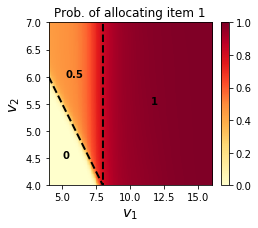

In [6]:
points = [(4, 6), (8, 4), (8, 7)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))
        
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[4,16,4,7], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4)
                    
plt.text(5, 4.5, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(5.25, 6, s='0.5', color='black', fontsize='10', fontweight='bold')
plt.text(11.5, 5.5, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

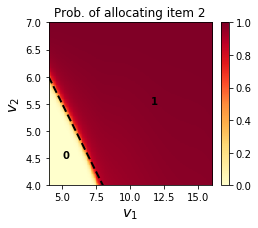

In [7]:
points = [(4, 6), (8, 4)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))
        
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[4,16,4,7], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4)
                    
plt.text(5, 4.5, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(11.5, 5.5, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)